# Pulsed NMR Individual Analysis

Use this template to carry out the analysis tasks for the Noise experiment.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

There is no need to calculate uncertainties for this analysis.  The goals here are only to see and understand general trends.  You may want to use the [LMFit](https://lmfit.github.io/lmfit-py/) package.

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from lmfit.models import LinearModel
from lmfit.models import QuadraticModel

## Prior to working on this notebook:

1. Obtain the measurements of $T_1$ and $T_2$ half-life times for the series of measurements taken from Experiment 2, the effects of paramagnetic ions on the decay constants.  The data are ordered in terms of dilution "number".

2. Obtain the measurements of the delay times versus echo amplitudes from Experiment 3.  The data should be in a simple .csv spreadsheet.

### Then...
3. Import the data tables for each experiment.

### For Experiment 2:

4. Convert the "dilution number" to ion concentration in moles/liter ("molarity").  See below for details.

5. Convert the half-life times to $T_1$, $T_2$ values.

6. Plot $T_1$, and $T_2$ versus concentration on the same graph.  Select axis types (linear or log) to make the relationship look like a line.  

7. in your group document, compare your graph to the results reported by Hahn.

### For Experiment 3:

8. Convert the delay times to echo-position times.  (What is the relationship between the time of the B pulse and the echo produced by it?)

9. Plot the echo amplitudes versus echo times.

10. Fit the data set to the function given in the instructions on page 25 and 26 to obtain the constant $K$.  For $T_2$ use the result for water, and fix it so that it does not get adjusted by the fitting routine.



## Import data tables

Display them so that you know they are correct.

In [2]:
exp1 = pd.read_excel('data.xlsx', sheet_name='exp1')
print(exp1.keys())
exp2 = pd.read_excel('data.xlsx', sheet_name='exp2')
print(exp2.keys())

Index(['Sample', 'Frequency (MHz)', 'T1 half life (ms)', 'T1 unc (ms)',
       'T2 half life (ms)', 'T2 unc (ms)'],
      dtype='object')
Index(['fraction denominator', 'Relative Concentration', 'Frequency (MHz)',
       'T1 half life (ms)', 'T1 unc (ms)', 'T2 half life (ms)', 'T2 unc (ms)'],
      dtype='object')


In [3]:
print(exp1.head())
print(exp2.head())

                     Sample  Frequency (MHz)  T1 half life (ms)  T1 unc (ms)  \
0               Mineral Oil           14.766               20.0         0.05   
1  Vaseline petroleum jelly           14.766               19.0         0.05   
2                  glycerin           14.766               25.3         0.05   
3                     water           14.766             4000.0         5.00   
4             Ethyl alcohol           14.766              910.0         0.50   

   T2 half life (ms)  T2 unc (ms)  
0                 27         0.05  
1                 20         0.05  
2                 34         0.05  
3                 96         0.05  
4                120         0.50  
   fraction denominator  Relative Concentration  Frequency (MHz)  \
0                     4                0.250000         14.76633   
1                    16                0.062500         14.76633   
2                    64                0.015625         14.76633   
3                   256        

## Experiment 2

### Massage the collected data

Convert the measured half-life times to $T_1$ and $T_2$ values, and convert the **Dilution number** to concentration.

Each **Dilution number** represents a dilution by a factor of 4 (i.e., one drop of solution mixed with 3 drops of pure water).  So of the original concentration is $C_0$, the first dilution is $C_0/4$ the second dilution is $C_0/4^2$, and in general the $n\,$th dilution is $C_0/4^n$.

The compound used in solution is Cupric Sulfate, 5-Hydrate (CuSO<sub>4</sub>$\cdot$5H<sub>2</sub>O) which has a formula weight of 249.68 g/mol and a slubility of 32 g/100ml of water at 20C.  Calculate the concentration in molarity (mol/liter) of the copper ions.

In [4]:
def model_fit(xdata, ydata, model=LinearModel()):
    params = model.guess(ydata, x=xdata)
    fit = model.fit(ydata, params, x=xdata)
    return fit.params

In [5]:
df = exp2.dropna()
# divide t1 and t2 half-life by ln(2) to get the T1 and T2 decay constants
df['t1'] = df['T1 half life (ms)'] / np.log(2)
df['t1_unc'] = df['T1 unc (ms)'] / np.log(2)
df['t2'] = df['T2 half life (ms)'] / np.log(2)
df['t2_unc'] = df['T2 unc (ms)'] / np.log(2)

C:\Users\alber\AppData\Local\Temp/ipykernel_307132/109373256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t1'] = df['T1 half life (ms)'] / np.log(2)
C:\Users\alber\AppData\Local\Temp/ipykernel_307132/109373256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t1_unc'] = df['T1 unc (ms)'] / np.log(2)
C:\Users\alber\AppData\Local\Temp/ipykernel_307132/109373256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [6]:
# assuming the original cuso4 solution is fully saturated, find C_0 
formula_weight = 249.68
solubility = 32
concentration_0 = solubility / formula_weight * 10 

In [7]:
# find the concentration of dilute solution
df['concentration'] = concentration_0 / df['fraction denominator']
df.head

C:\Users\alber\AppData\Local\Temp/ipykernel_307132/3201670223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concentration'] = concentration_0 / df['fraction denominator']


<bound method NDFrame.head of    fraction denominator  Relative Concentration  Frequency (MHz)  \
0                     4                0.250000         14.76633   
1                    16                0.062500         14.76633   
2                    64                0.015625         14.76633   
3                   256                0.003906         14.76633   
4                  1024                0.000977         14.76633   
5                  4096                0.000246         14.76633   

   T1 half life (ms)  T1 unc (ms)  T2 half life (ms)  T2 unc (ms)  \
0                2.3        0.005                3.2        0.005   
1               14.0        0.050               10.4        0.050   
2               96.0        0.050               82.0        0.050   
3              162.0        0.500              129.0        0.500   
4              300.0        0.500              337.0        0.500   
5             1650.0        5.000              198.0        0.500   

         

In [8]:
# apply fit to the data
t1_fit_params = model_fit(np.log(df['concentration']), np.log(df['t1']))
t2_fit_params = model_fit(np.log(df['concentration']), np.log(df['t2']))


In [9]:
t1_fit_params

name,value,standard error,relative error,initial value,min,max,vary
slope,-0.87789087,0.09252978,(10.54%),-0.8778908721042279,-inf,inf,True
intercept,0.69750447,0.47902445,(68.68%),0.6975044733818687,-inf,inf,True


### Plot it

Make a plot that shows the relationship as a line (or close to it), by adjusting the axis types used to make the plot.

To see how to change the axis types, look here: [pyplot.xscale()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html#matplotlib.pyplot.xscale)

C:\Users\alber\AppData\Local\Temp/ipykernel_307132/1085452846.py:3: RuntimeWarning: divide by zero encountered in log
  t1_fit = np.exp(t1_fit_params['slope'] * np.log(xfit) + t1_fit_params['intercept'])
C:\Users\alber\AppData\Local\Temp/ipykernel_307132/1085452846.py:4: RuntimeWarning: divide by zero encountered in log
  t2_fit = np.exp(t2_fit_params['slope'] * np.log(xfit) + t2_fit_params['intercept'])


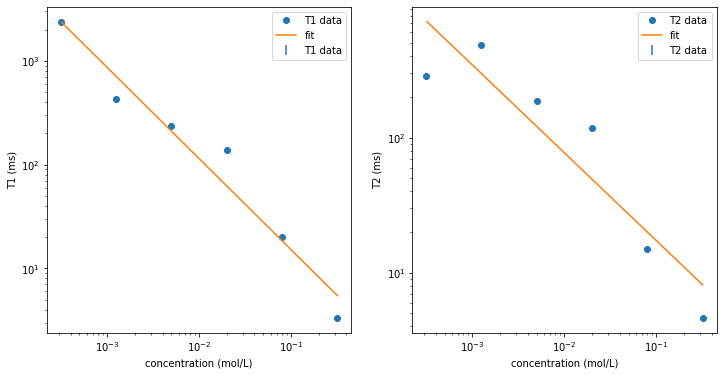

In [10]:
xfit = np.linspace(0, df['concentration'].max(), 1000)
# calulate the t1 and t2 decay constants from the fit parameters
t1_fit = np.exp(t1_fit_params['slope'] * np.log(xfit) + t1_fit_params['intercept'])
t2_fit = np.exp(t2_fit_params['slope'] * np.log(xfit) + t2_fit_params['intercept'])
# plot concentration vs. T1 and T2 decay constants and their fits line
# set scale to log-log for better visualization
# plot error bars for T1 and T2 decay constants
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(df['concentration'], df['t1'], 'o', label='T1 data')
ax[0].plot(xfit, t1_fit, '-', label='fit')
ax[0].errorbar(df['concentration'], df['t1'], yerr=df['t1_unc'], fmt='none', label='T1 error')
ax[0].set_xlabel('concentration (mol/L)')
ax[0].set_ylabel('T1 (ms)')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].legend()
ax[1].plot(df['concentration'], df['t2'], 'o', label='T2 data')
ax[1].plot(xfit, t2_fit, '-', label='fit')
ax[1].errorbar(df['concentration'], df['t2'], yerr=df['t2_unc'], fmt='none', label='T2 error')
ax[1].set_xlabel('concentration (mol/L)')
ax[1].set_ylabel('T2 (ms)')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend()


## Experiment 3: diffusion study

### Massage the collected data

Rescale the **Delay_time** data to give the echo-position time.

### Plot it

Plot the echo peak voltage vs. echo-position time.

###  Fit it

Use the LMFit Model class to fit the data to equation (15) in the instructions.  In this data set the number of pulses between the first FID and the echo, $n=1$.  In your fit function, set the value of $T_2$ to be a constant (not a parameter that is adjustable by the fit), and set it to the $T_2$ value obtained for pure water.

Hint: to estimate a starting value for $K$, calculate the value of the function for the time $t$ at which it is half the height it is at $t=0$.  This is like a "half-life" even though the decay is not a simple exponential.

In [1]:
## Define the fit function


## pull in the Model class and set up the fit

from lmfit import Model

## Fit and plot


### Optional: Estimate the self-diffusion constant of water

According to equation (16) in the instructions, 

$$ K = \frac{\gamma^2}{12}\left(\frac{\partial B_0}{\partial z}\right)^2 D$$

and $\gamma\Delta B_0 = \Delta\omega_0$, the spread of precession frequencies that determines $T_2^*$.  From this information and the width of the simple free induction decay, you can use the result for $K$ to estimate $D$ the diffusion constant for water (at room temperature).

Try this, and compare your result against Hahn's: [Hahn, E. L., "Spin echoes", Phys. Rev., 80, 580-594 (1950)](http://courses.washington.edu/phys431/restricted/Hahn_PR80.pdf), p. 589.